## Przedstawienie wyników różnych algorytmów poleceń dla wybranego użytkownika

In [1]:
import pandas as pd
import clustering as cl
import knn as knn_alg

In [2]:
# Import datasetu
movies = pd.read_csv('data/movie.csv')
ratings = pd.read_csv('data/rating.csv')

In [3]:
# wybór użytkownika, dla którego będziemy polecać filmy, oraz ile filmów chcemy wyświetlić
user_id = 23
number_of_movies = 10

## Metoda klasteryzacji algorytmem k-średnich

In [4]:
# Tworzenie klastrów może zająć do około minuty
RS = cl.SystemRekomendacji(ratings, movies)
RS.prepare_clusters()

Termination criterion satisfied


True

In [5]:
recommended_movies = RS.recommend_movies(number_of_movies, user_id)
recommended_movies

,title
0,"Godfather, The (1972)"
1,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
2,Paths of Glory (1957)
3,Casablanca (1942)
4,Rear Window (1954)
5,"Third Man, The (1949)"
6,"Godfather: Part II, The (1974)"
7,12 Angry Men (1957)
8,City Lights (1931)
9,Schindler's List (1993)


## KNN - k Nearest Neighbors

In [6]:
movie_details_df = pd.DataFrame(columns=['movieId', 'title', 'genres'])
movie_recommender = knn_alg.MovieRecommender(movies, ratings)
movie_ids_list = movie_recommender.recommend_movies(user_id, number_of_movies, False)

rows_to_append = []
for arr in movie_ids_list:
    for movie_id in arr:
        movie_row = movies[movies['movieId'] == movie_id]
        if not movie_row.empty:
            rows_to_append.append(movie_row.iloc[0])

if rows_to_append:
    movie_details_df = pd.concat([movie_details_df, pd.DataFrame(rows_to_append)], ignore_index=True)

movie_details_df

Maximum rating for user 23 : 5.0
Movies with the maximum rating: [32, 47, 50, 223, 293, 296, 318, 508, 527, 535, 555, 608, 678, 778, 1047, 1059, 1060, 1089, 1095, 1111, 1188, 1249, 1358, 1500, 1527, 1580, 1584, 1617, 1653, 1704, 1754, 1805, 1833, 1835, 1909, 2006, 2028, 2058, 2294, 2324, 2952]


,movieId,title,genres
0,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
2,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
3,648,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
4,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
5,541,Blade Runner (1982),Action|Sci-Fi|Thriller
6,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller
7,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
8,1214,Alien (1979),Horror|Sci-Fi
9,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


## Metoda 3

In [7]:
# kod

## Porównanie zwróconych wyników

In [8]:
import matplotlib.pyplot as plt
def genre_graph_plot(recommended_movies):
    # Łączymy ramki danych na podstawie tytułów filmów
    merged_df = pd.merge(movies, recommended_movies, on='title', how='inner')

    # Grupujemy po gatunkach i liczymy wystąpienia każdego gatunku
    genres_counts = movies[movies['title'].isin(merged_df['title'])]['genres'].str.split('|', expand=True).stack().value_counts()

    # Tworzymy wykres słupkowy
    plt.figure(figsize=(10, 6))
    plt.bar(genres_counts.keys(), genres_counts.values, color='skyblue')
    plt.xlabel('Gatunki filmów')
    plt.ylabel('Liczba wystąpień')
    plt.title('Najczęściej występujące gatunki filmów')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

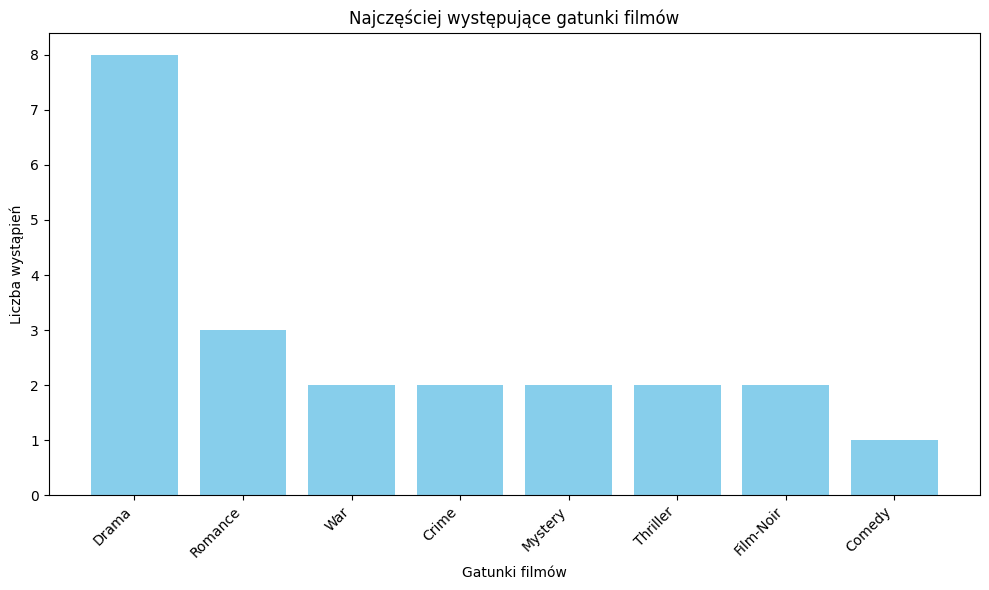

In [9]:
genre_graph_plot(recommended_movies)

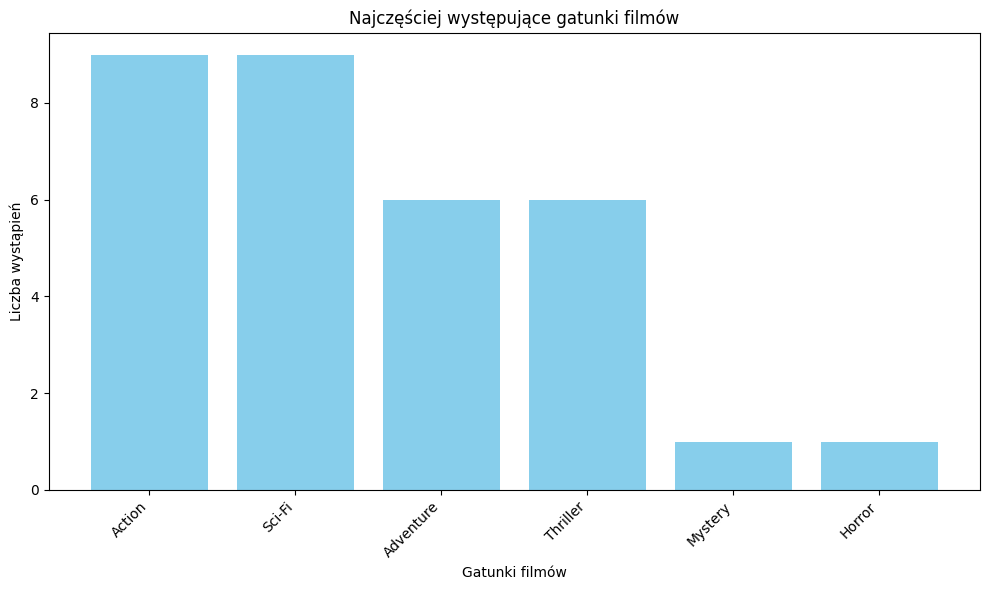

In [10]:
genre_graph_plot(movie_details_df)